#12-2 사례별 시계열 데이터 계산하기
에볼라 최초 발병일 계산하기

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ebola = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [6]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [7]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


파산한 은행의 개수 계산하기

In [10]:
banks = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/data/banklist.csv')
print(banks.head())

                                           Bank Name  ... Updated Date
0                Washington Federal Bank for Savings  ...    20-Dec-17
1    The Farmers and Merchants State Bank of Argonia  ...    20-Oct-17
2                                Fayette County Bank  ...    26-Jul-17
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...  ...    26-Jul-17
4                                     First NBC Bank  ...     5-Dec-17

[5 rows x 7 columns]


In [11]:
banks_no_dates = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/data/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [12]:
banks = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/data/banklist.csv', parse_dates = [5, 6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [14]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name  ... closing_year
0                Washington Federal Bank for Savings  ...         2017
1    The Farmers and Merchants State Bank of Argonia  ...         2017
2                                Fayette County Bank  ...         2017
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...  ...         2017
4                                     First NBC Bank  ...         2017

[5 rows x 9 columns]


In [15]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [16]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

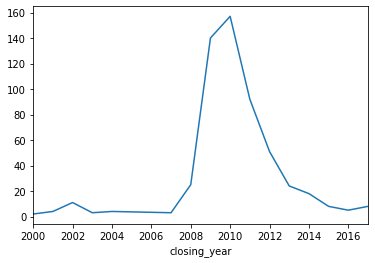

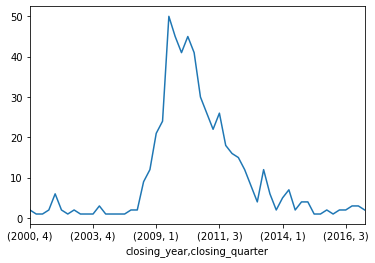

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

테슬라 주식 데이터로 시간 계산하기

In [0]:
tesla = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/data/tesla_stock_quandl.csv')

In [29]:
print(tesla.head())

         Date    Open    High     Low  ...  AdjHigh  AdjLow  AdjClose   AdjVolume
0  2018-03-27  304.00  304.27  277.18  ...   304.27  277.18    279.18  13696168.0
1  2018-03-26  307.34  307.59  291.36  ...   307.59  291.36    304.18   8324639.0
2  2018-03-23  311.25  311.61  300.45  ...   311.61  300.45    301.54   6600538.0
3  2018-03-22  313.89  318.82  308.18  ...   318.82  308.18    309.10   4914307.0
4  2018-03-21  310.25  322.44  310.19  ...   322.44  310.19    316.53   5927881.0

[5 rows x 13 columns]


In [30]:
tesla = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/data/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
Date          1949 non-null datetime64[ns]
Open          1949 non-null float64
High          1949 non-null float64
Low           1949 non-null float64
Close         1949 non-null float64
Volume        1949 non-null float64
ExDividend    1949 non-null float64
SplitRatio    1949 non-null float64
AdjOpen       1949 non-null float64
AdjHigh       1949 non-null float64
AdjLow        1949 non-null float64
AdjClose      1949 non-null float64
AdjVolume     1949 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [31]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  ...  AdjHigh  AdjLow  AdjClose   AdjVolume
1947 2010-06-30  25.79  30.4192  23.30  ...  30.4192   23.30     23.83  17187100.0
1948 2010-06-29  19.00  25.0000  17.54  ...  25.0000   17.54     23.89  18766300.0

[2 rows x 13 columns]


datetime 오브젝트를 인덱스로 설정해 데이터 추출하기

In [32]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [33]:
print(tesla['2015'].iloc[:5, :5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


In [34]:
print(tesla['2010-06'].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


시간 간격을 인덱스로 지정해 데이터 추출하기

In [35]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High  ...  AdjClose   AdjVolume  ref_date
Date                                   ...                                
2018-03-27 2018-03-27  304.00  304.27  ...    279.18  13696168.0 2828 days
2018-03-26 2018-03-26  307.34  307.59  ...    304.18   8324639.0 2827 days
2018-03-23 2018-03-23  311.25  311.61  ...    301.54   6600538.0 2824 days
2018-03-22 2018-03-22  313.89  318.82  ...    309.10   4914307.0 2823 days
2018-03-21 2018-03-21  310.25  322.44  ...    316.53   5927881.0 2822 days

[5 rows x 14 columns]


In [36]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [38]:
print(tesla['5 days' :].iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


시간 범위 생성해 인덱스로 지정하기

In [39]:
ebola= pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/data/country_timeseries.csv', parse_dates =[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [40]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [41]:
head_range = pd.date_range(start = '2014-12-31', end = '2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [42]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


에볼라의 확산 속도 비교하기

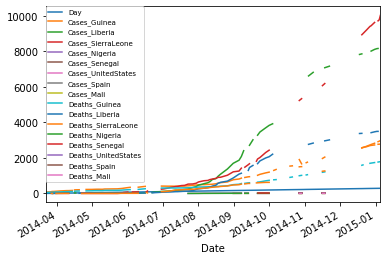

In [43]:
import matplotlib.pyplot as plt
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax =ax)
ax.legend(fontsize = 7, loc = 2, borderaxespad = 0.)
plt.show()

In [44]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [45]:
print(ebola.head().iloc[:, :5])
print('---------------')
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0
---------------
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-27 2014-03-27    5         103.0            8.0                6.0
2014-03-26 2014-03-26    4          86.0            NaN                NaN
2014-03-25 2014-03-25    3          86.0            NaN                NaN
2014-03-24 2014-03-24    2          86.0            NaN                NaN
2014-03-2

In [0]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [48]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [0]:
new_idx = reversed(new_idx)

In [51]:
ebola = ebola
print(ebola.head().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


In [52]:
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-27 2014-03-27    5         103.0            8.0                6.0
2014-03-26 2014-03-26    4          86.0            NaN                NaN
2014-03-25 2014-03-25    3          86.0            NaN                NaN
2014-03-24 2014-03-24    2          86.0            NaN                NaN
2014-03-22 2014-03-22    0          49.0            NaN                NaN


In [53]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [54]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [55]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [56]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [0]:
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

In [0]:
ebola_shift = pd.DataFrame(ebola_dict)

In [59]:
print(ebola_shift.tail())

                 Date  Day  ...  Deaths_Spain  Deaths_Mali
Date                        ...                           
2014-03-27 2014-03-27    5  ...           NaN          NaN
2014-03-26 2014-03-26    4  ...           NaN          NaN
2014-03-25 2014-03-25    3  ...           NaN          NaN
2014-03-24 2014-03-24    2  ...           NaN          NaN
2014-03-22 2014-03-22    0  ...           NaN          NaN

[5 rows x 18 columns]


In [60]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis = 1)
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  ...  Deaths_Spain  Deaths_Mali
Day                               ...                           
5           103.0           18.0  ...           NaN          NaN
4            86.0            8.0  ...           NaN          NaN
3            86.0            8.0  ...           NaN          NaN
2            86.0            7.0  ...           NaN          NaN
0            49.0            3.0  ...           NaN          NaN

[5 rows x 16 columns]


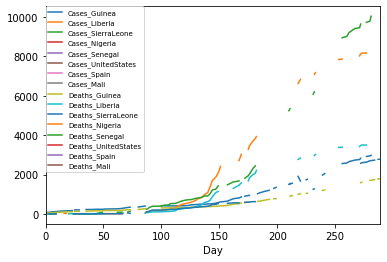

In [61]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax = ax)
ax.legend(fontsize = 7, loc = 2, borderaxespad = 0.)
plt.show()